# Crop yield prediction

## Mission: 
To develop an accurate predictive model that empowers regional agronomists with data-driven insights for optimizing agricultural inputs, maximizing crop productivity, and minimizing resource waste through intelligent analysis of soil properties, weather patterns, and farming practices.

## Dataset Overview:

**Location:** `summative/linear_regression/data/crop_yield.csv`

**Size:** 1,000,000 samples

**Features:**
- **Categorical:** Region, Soil_Type, Crop, Weather_Condition
- **Boolean:** Fertilizer_Used, Irrigation_Used  
- **Numerical:** Rainfall_mm, Temperature_Celsius, Days_to_Harvest, Yield_tons_per_hectare

**Target Variable:** Yield_tons_per_hectare

**Source:** Course dataset supplied as `crop_yield.csv`

In [7]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

import joblib


In [4]:
# Load dataset
df = pd.read_csv("crop_yield.csv")
df.head()


,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251


In [5]:
# Dataset Overview
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Region                  1000000 non-null  object 
 1   Soil_Type               1000000 non-null  object 
 2   Crop                    1000000 non-null  object 
 3   Rainfall_mm             1000000 non-null  float64
 4   Temperature_Celsius     1000000 non-null  float64
 5   Fertilizer_Used         1000000 non-null  bool   
 6   Irrigation_Used         1000000 non-null  bool   
 7   Weather_Condition       1000000 non-null  object 
 8   Days_to_Harvest         1000000 non-null  int64  
 9   Yield_tons_per_hectare  1000000 non-null  float64
dtypes: bool(2), float64(3), int64(1), object(4)
memory usage: 62.9+ MB


,Rainfall_mm,Temperature_Celsius,Days_to_Harvest,Yield_tons_per_hectare
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,549.981901,27.504965,104.495025,4.649472
std,259.851320,7.220608,25.953412,1.696572
min,100.000896,15.000034,60.000000,-1.147613
25%,324.891090,21.254502,82.000000,3.417637
50%,550.124061,27.507365,104.000000,4.651808
75%,774.738520,33.753267,127.000000,5.879200
max,999.998098,39.999997,149.000000,9.963372


In [6]:
# Convert categorical variables to numerical 
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()


,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Days_to_Harvest,Yield_tons_per_hectare,Region_North,Region_South,Region_West,Soil_Type_Clay,...,Soil_Type_Peaty,Soil_Type_Sandy,Soil_Type_Silt,Crop_Cotton,Crop_Maize,Crop_Rice,Crop_Soybean,Crop_Wheat,Weather_Condition_Rainy,Weather_Condition_Sunny
0,897.077239,27.676966,False,True,122,6.555816,False,False,True,False,...,False,True,False,True,False,False,False,False,False,False
1,992.673282,18.026142,True,True,140,8.527341,False,True,False,True,...,False,False,False,False,False,True,False,False,True,False
2,147.998025,29.794042,False,False,106,1.127443,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,986.866331,16.644190,False,True,146,6.517573,True,False,False,False,...,False,True,False,False,False,False,True,False,True,False
4,730.379174,31.620687,True,True,110,7.248251,False,True,False,False,...,False,False,True,False,False,False,False,True,False,False


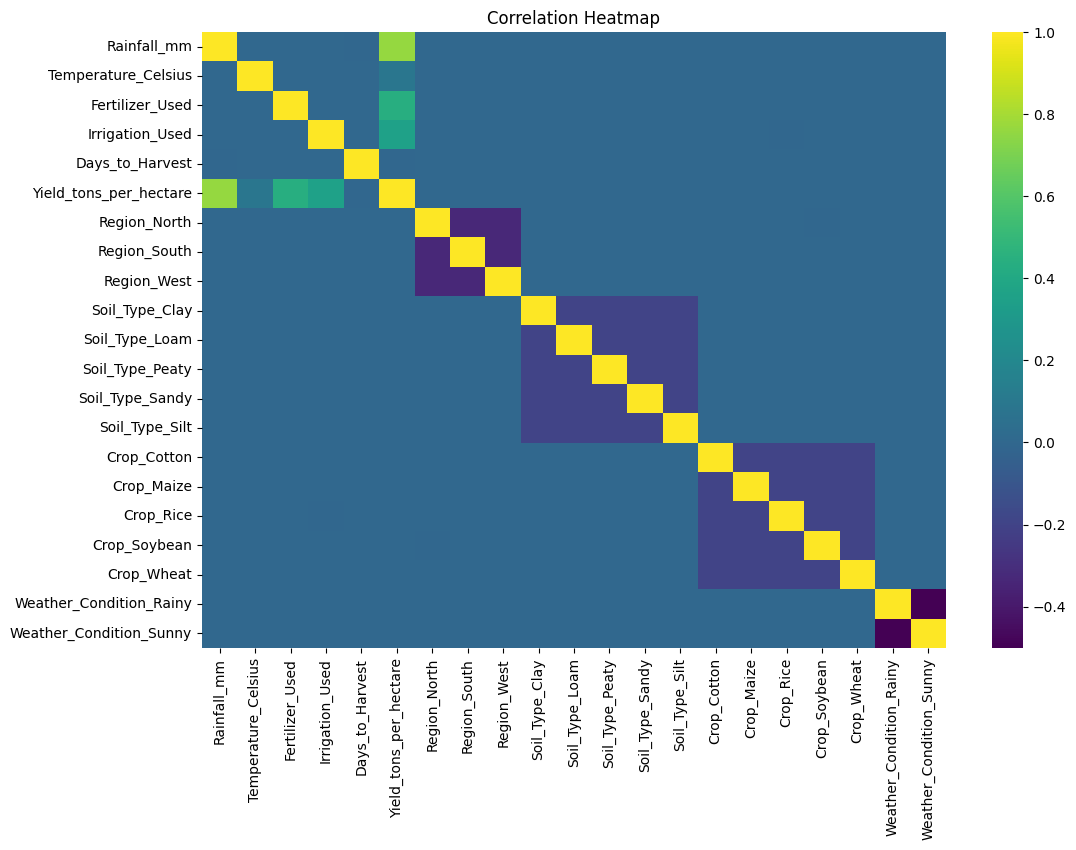

In [8]:
# Correlation Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df_encoded.corr(), cmap="viridis")
plt.title("Correlation Heatmap")
plt.show()


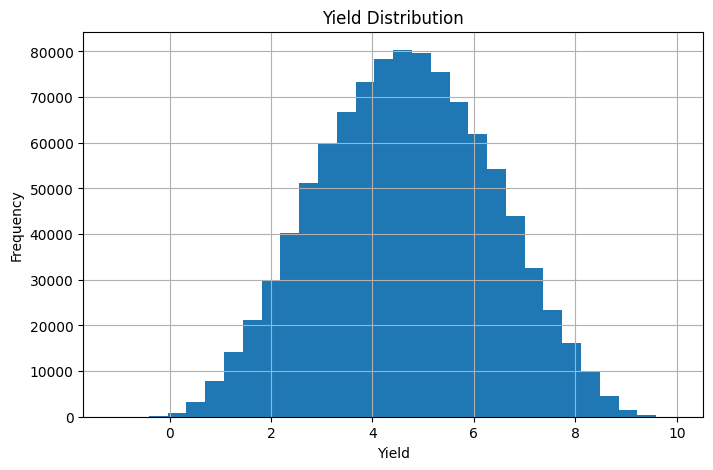

In [9]:
# Distributions
df['Yield_tons_per_hectare'].hist(bins=30, figsize=(8,5))
plt.title("Yield Distribution")
plt.xlabel("Yield")
plt.ylabel("Frequency")
plt.show()


In [10]:
# feature engineering
y = df_encoded["Yield_tons_per_hectare"]
X = df_encoded.drop("Yield_tons_per_hectare", axis=1)


In [11]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [12]:
# standardize data 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [13]:
# linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

y_pred_linear = linear_model.predict(X_test_scaled)
linear_mse = mean_squared_error(y_test, y_pred_linear)
linear_mse


0.2507766685719747

In [14]:
# decision tree model
tree_model = DecisionTreeRegressor(max_depth=10)
tree_model.fit(X_train, y_train)

y_pred_tree = tree_model.predict(X_test)
tree_mse = mean_squared_error(y_test, y_pred_tree)
tree_mse


0.25366372691046424

In [16]:
# random forest model
rf = RandomForestRegressor(
    n_estimators=50,
    max_depth=20,
    n_jobs=-1,
    random_state=42
)


In [19]:
# random forest model

rf = RandomForestRegressor(
    n_estimators=50,     # fast + accurate
    max_depth=20,        # prevents slow deep trees
    n_jobs=-1,           # uses all CPU cores
    random_state=42
)

# train the model
rf.fit(X_train_scaled, y_train)

# predictions
rf_train_pred = rf.predict(X_train_scaled)
rf_test_pred  = rf.predict(X_test_scaled)

# MSE 
rf_mse = mean_squared_error(y_test, rf_test_pred)

rf_mse


0.2605158684759571

In [23]:
# determine best model

results = {
    "Linear Regression MSE": linear_mse,
    "Decision Tree MSE": tree_mse,
    "Random Forest MSE": rf_mse
}

results


{'Linear Regression MSE': 0.2507766685719747,
 'Decision Tree MSE': 0.25366372691046424,
 'Random Forest MSE': 0.2605158684759571}

In [26]:
# select best model based on lowest MSE

best_name = min(results, key=results.get)
print("Best model is:", best_name)

# Assign trained model based on key
if best_name == "Linear Regression MSE":
    best_model = linear_model
elif best_name == "Decision Tree MSE":
    best_model = tree_model
else:
    best_model = rf_model   # trained Random Forest

best_model


Best model is: Linear Regression MSE


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [28]:
# predict on one test row

sample = X_test.iloc[0]              
scaled_sample = scaler.transform([sample])  

prediction = best_model.predict(scaled_sample)

print("Prediction for sample 0:", prediction[0])


Prediction for sample 0: 4.047939036039939


C:\Users\Hp\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


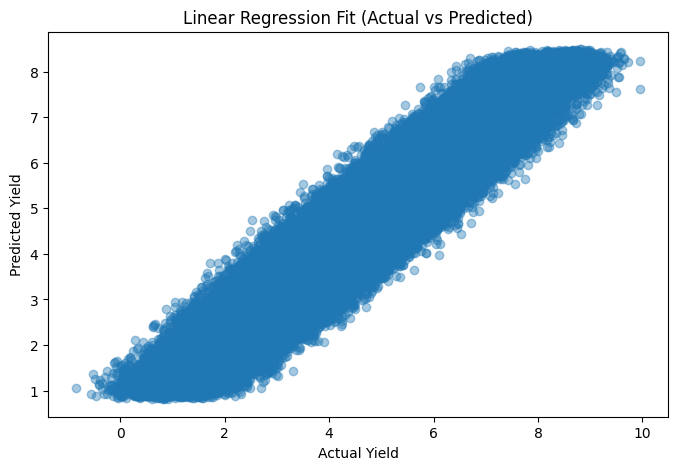

In [29]:
# scatter plot before and after fit
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_linear, alpha=0.4)
plt.xlabel("Actual Yield")
plt.ylabel("Predicted Yield")
plt.title("Linear Regression Fit (Actual vs Predicted)")
plt.show()


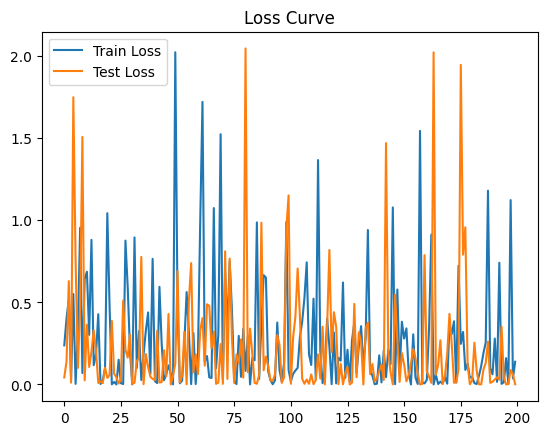

In [30]:
# loss curve 
train_preds = linear_model.predict(X_train_scaled)
test_preds = linear_model.predict(X_test_scaled)

train_losses = (y_train - train_preds)**2
test_losses = (y_test - test_preds)**2

plt.plot(train_losses.values[:200], label="Train Loss")
plt.plot(test_losses.values[:200], label="Test Loss")
plt.legend()
plt.title("Loss Curve")
plt.show()
